# **MÁSTER DE DATA SCIENCE**
**Práctica 1**

**Estudiante** Diego Armando Cale Pillco  **Fecha** 11/11/2019

En esta práctica se elabora un caso práctico orientado a aprender a identificar los datos relevantes por un proyecto analítico y usar las herramientas de extracción de datos.
 
 
 
 
  
 
 
 
 
 
 
 


**1. Contexto. Explicar en qué contexto se ha recolectado la información. Explique por qué el sitio web elegido proporciona dicha información.**

Para el desarrollo de la presente página se ha realizado de la página https://www.hubertiming.com/ sitio web que permite visualizar el cortometraje de las carreras desde 2009 y actualmente cronometra más de 60 carreras al año. Presenta un amplio conocimiento técnico, una comprensión profunda de la gestión de eventos y las operaciones de carrera, y un alto nivel de atención a los detalles. 

El conjunto de datos utilizado en esta práctica se tomó de una carrera de 5 km que tuvo lugar en McMenamins Edgefield, Troutdale, OR el 2 de febrero de 2019.
Del siguiente sitio web: https://www.hubertiming.com/results/2019WorstDay

Específicamente, analizará el rendimiento de los corredores de 5 km y responderá preguntas como:

* ¿Cuál fue el tiempo promedio de finalización para los corredores?
* ¿Los tiempos de finalización de los corredores siguieron una distribución normal?
* ¿Hubo alguna diferencia de rendimiento entre hombres y mujeres de varios grupos de edad?

# **Web Scraping usando Python**
***Web Scraping usando Beautiful Soup***

Comienzo a importando los módulos necesarios (pandas, numpy, matplotlib.pyplot, seaborn). Para mostrar fácilmente los gráficos, asegúrese de incluir la línea% matplotlib en línea como se muestra a continuación.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Para realizar el raspado web, también debe importar las bibliotecas que se muestran a continuación. El módulo request se usa para abrir URL. El paquete Beautiful Soup se usa para extraer datos de archivos html. El nombre de la biblioteca de Beautiful Soup es bs4, que significa Beautiful Soup, versión 4.

In [0]:
import requests
from bs4 import BeautifulSoup


Después de importar los módulos necesarios, debe especificar la URL que contiene el conjunto de datos y pasarlo a get () para obtener el html de la página.

In [0]:
url='https://www.hubertiming.com/results/2019WorstDay' 
pagina_html = requests.get(url)
pagina_html=pagina_html.text

Obtener el html de la página es solo el primer paso. El siguiente paso es crear un objeto Beautiful Soup a partir del html. Esto se hace pasando el html a la función BeautifulSoup (). El paquete Beautiful Soup se usa para analizar el html, es decir, tomar el texto html sin procesar y dividirlo en objetos Python. El segundo argumento 'lxml' es el analizador html cuyos detalles no necesita preocuparse en este momento.

In [58]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(pagina_html, 'lxml')
type(soup)

bs4.BeautifulSoup

El objeto soup le permite extraer información interesante sobre el sitio web que está raspando, como obtener el título de la página como se muestra a continuación.

In [60]:
# Obtener título de la página
title = soup.title
print(title)

<title>2019 Worst Day of the Year 5K Race Results</title>


También puede obtener el texto de la página web e imprimirlo rápidamente para verificar si es lo que espera.

In [0]:
# Imprimir los elementos de la págna Html
text = soup.get_text()
#print(soup.text)

Para imprimir solo las filas de la tabla, pase el argumento 'tr' en soup.find_all ().

In [65]:
# Print the first 100 rows for sanity check
rows = soup.find_all('tr')
print(rows[:100])

[<tr colspan="2"><b>5K:</b></tr>, <tr><td>Finishers:</td><td>123</td></tr>, <tr><td>Male:</td><td>44</td></tr>, <tr><td>Female:</td><td>79</td></tr>, <tr class="header">\n<th>Place</th>\n<th>Bib</th>\n<th>Name</th>\n<th>Gender</th>\n<th>Age</th>\n<th>City</th>\n<th>State</th>\n<th>Chip Time</th>\n<th>Chip Pace</th>\n<th>Gender Place</th>\n<th>Age Group</th>\n<th>Age Group Place</th>\n<th>Time to Start</th>\n<th>Gun Time</th>\n</tr>, <tr>\n<td>1</td>\n<td>1378</td>\n<td>BRADY BEAGLEY</td>\n<td>M</td>\n<td>27</td>\n<td>PORTLAND</td>\n<td>OR</td>\n<td>19:17</td>\n<td>6:13</td>\n<td>1 of 44</td>\n<td>M 25-29</td>\n<td>1 of 4</td>\n<td>1:00:02</td>\n<td>1:19:19</td>\n</tr>, <tr>\n<td>2</td>\n<td>1302</td>\n<td>SCOTT GULLICKSON</td>\n<td>M</td>\n<td>55</td>\n<td>RIDGEFIELD</td>\n<td>WA</td>\n<td>20:55</td>\n<td>6:45</td>\n<td>2 of 44</td>\n<td>M 55-59</td>\n<td>1 of 4</td>\n<td>1:00:01</td>\n<td>1:20:56</td>\n</tr>, <tr>\n<td>3</td>\n<td>1364</td>\n<td>JAMES DAVIS</td>\n<td>M</td>\n<td>15</t

El objetivo de este tutorial es tomar una tabla de una página web y convertirla en un marco de datos para una manipulación más fácil usando Python. Para llegar allí, primero debe obtener todas las filas de la tabla en forma de lista y luego convertir esa lista en un marco de datos. A continuación se muestra un bucle for que recorre las filas de la tabla e imprime las celdas de las filas.

In [67]:
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td>123</td>, <td>1444</td>, <td>DAWN GEOPPINGER</td>, <td>F</td>, <td>40</td>, <td>PORTLAND</td>, <td>OR</td>, <td>2:09:59</td>, <td>41:56</td>, <td>79 of 79</td>, <td>F 40-44</td>, <td>20 of 20</td>, <td>1:02:40</td>, <td>3:12:39</td>]


bs4.element.ResultSet

El resultado anterior muestra que cada fila se imprime con etiquetas html incrustadas en cada fila. Esto no es lo que quieres. Puede usar eliminar las etiquetas html usando Beautiful Soup o expresiones regulares.

La forma más fácil de eliminar etiquetas html es usar Beautiful Soup, y solo se necesita una línea de código para hacerlo. Pase la cadena de interés a BeautifulSoup () y use el método get_text () para extraer el texto sin etiquetas html.

In [68]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[123, 1444, DAWN GEOPPINGER, F, 40, PORTLAND, OR, 2:09:59, 41:56, 79 of 79, F 40-44, 20 of 20, 1:02:40, 3:12:39]


Se desaconseja el uso de expresiones regulares, ya que requiere varias líneas de código y uno puede cometer errores fácilmente. Requiere importar el módulo re (para expresiones regulares). El siguiente código muestra cómo crear una expresión regular que encuentre todos los caracteres dentro de las etiquetas <td> html y reemplazarlos con una cadena vacía para cada fila de la tabla. Primero, compila una expresión regular pasando una cadena para que coincida con re.compile (). El punto, la estrella y el signo de interrogación (. *?) Coincidirán con un paréntesis angular de apertura seguido de cualquier cosa y seguido de un paréntesis angular de cierre. Coincide con el texto de una manera no codiciosa, es decir, coincide con la cadena más corta posible. Si omite el signo de interrogación, coincidirá con todo el texto entre el primer paréntesis angular de apertura y el último paréntesis angular de cierre. Después de compilar una expresión regular, puede usar el método re.sub () para buscar todas las subcadenas donde coincida la expresión regular y reemplazarlas con una cadena vacía. El código completo a continuación genera una lista vacía, extrae el texto entre las etiquetas html para cada fila y lo agrega a la lista asignada.

In [69]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[123, 1444, DAWN GEOPPINGER, F, 40, PORTLAND, OR, 2:09:59, 41:56, 79 of 79, F 40-44, 20 of 20, 1:02:40, 3:12:39]


str

El siguiente paso es convertir la lista en un marco de datos y obtener una vista rápida de las primeras 10 filas con Pandas.

In [70]:
import pandas as pd
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,[]
1,"[Finishers:, 123]"
2,"[Male:, 44]"
3,"[Female:, 79]"
4,[]
5,"[1, 1378, BRADY BEAGLEY, M, 27, PORTLAND, OR, ..."
6,"[2, 1302, SCOTT GULLICKSON, M, 55, RIDGEFIELD,..."
7,"[3, 1364, JAMES DAVIS, M, 15, SHERWOOD, OR, 22..."
8,"[4, 1330, KEVIN ERICKSON, M, 34, VANCOUVER, WA..."
9,"[5, 1372, STEPHEN WILLIAMS, M, 24, PORTLAND, O..."


# **Manipulación y limpieza de datos**

El marco de datos no está en el formato que queremos. Para limpiarlo, debe dividir la columna "0" en varias columnas en la posición de coma. Esto se logra utilizando el método str.split ().

In [71]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[],None,None,None,None,None,None,None,None,None,None,None,None,None
1,[Finishers:,123],None,None,None,None,None,None,None,None,None,None,None,None
2,[Male:,44],None,None,None,None,None,None,None,None,None,None,None,None
3,[Female:,79],None,None,None,None,None,None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None,None,None,None,None,None
5,[1,1378,BRADY BEAGLEY,M,27,PORTLAND,OR,19:17,6:13,1 of 44,M 25-29,1 of 4,1:00:02,1:19:19]
6,[2,1302,SCOTT GULLICKSON,M,55,RIDGEFIELD,WA,20:55,6:45,2 of 44,M 55-59,1 of 4,1:00:01,1:20:56]
7,[3,1364,JAMES DAVIS,M,15,SHERWOOD,OR,22:47,7:21,3 of 44,M 15-19,1 of 1,0:04,22:51]
8,[4,1330,KEVIN ERICKSON,M,34,VANCOUVER,WA,22:52,7:22,4 of 44,M 30-34,1 of 2,0:03,22:55]
9,[5,1372,STEPHEN WILLIAMS,M,24,PORTLAND,OR,24:23,7:52,5 of 44,M 20-24,1 of 2,0:15,24:38]


Esto se ve mucho mejor, pero aún queda trabajo por hacer. El marco de datos tiene corchetes no deseados que rodean cada fila. Puede usar el método strip () para quitar el corchete de apertura en la columna "0".

In [72]:
df1[0] = df1[0].str.strip('[')
df1[0] = df1[0].str.strip(']')
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,123],None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,44],None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,79],None,None,None,None,None,None,None,None,None,None,None,None
4,,None,None,None,None,None,None,None,None,None,None,None,None,None
5,1,1378,BRADY BEAGLEY,M,27,PORTLAND,OR,19:17,6:13,1 of 44,M 25-29,1 of 4,1:00:02,1:19:19]
6,2,1302,SCOTT GULLICKSON,M,55,RIDGEFIELD,WA,20:55,6:45,2 of 44,M 55-59,1 of 4,1:00:01,1:20:56]
7,3,1364,JAMES DAVIS,M,15,SHERWOOD,OR,22:47,7:21,3 of 44,M 15-19,1 of 1,0:04,22:51]
8,4,1330,KEVIN ERICKSON,M,34,VANCOUVER,WA,22:52,7:22,4 of 44,M 30-34,1 of 2,0:03,22:55]
9,5,1372,STEPHEN WILLIAMS,M,24,PORTLAND,OR,24:23,7:52,5 of 44,M 20-24,1 of 2,0:15,24:38]


A la tabla le faltan encabezados de tabla. Puede usar el método find_all () para obtener los encabezados de la tabla.

In [0]:
col_labels = soup.find_all('th')

Similar a las filas de la tabla, puede usar Beautiful Soup para extraer texto entre etiquetas html para encabezados de tabla.

In [74]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

[u'[Place, Bib, Name, Gender, Age, City, State, Chip Time, Chip Pace, Gender Place, Age Group, Age Group Place, Time to Start, Gun Time]']


Luego puede convertir la lista de encabezados en un marco de datos de pandas.

In [75]:
df2 = pd.DataFrame(all_header)
all_header

[u'[Place, Bib, Name, Gender, Age, City, State, Chip Time, Chip Pace, Gender Place, Age Group, Age Group Place, Time to Start, Gun Time]']

Del mismo modo, puede dividir la columna "0" en varias columnas en la posición de coma para todas las filas.

In [76]:
df3 = df2[0].str.split(',', expand=True)
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time]


Los dos marcos de datos se pueden concatenar en uno usando el método concat () como se ilustra a continuación.

In [77]:
frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time]
0,,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,123],None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,44],None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,79],None,None,None,None,None,None,None,None,None,None,None,None
4,,None,None,None,None,None,None,None,None,None,None,None,None,None
5,1,1378,BRADY BEAGLEY,M,27,PORTLAND,OR,19:17,6:13,1 of 44,M 25-29,1 of 4,1:00:02,1:19:19]
6,2,1302,SCOTT GULLICKSON,M,55,RIDGEFIELD,WA,20:55,6:45,2 of 44,M 55-59,1 of 4,1:00:01,1:20:56]
7,3,1364,JAMES DAVIS,M,15,SHERWOOD,OR,22:47,7:21,3 of 44,M 15-19,1 of 1,0:04,22:51]
8,4,1330,KEVIN ERICKSON,M,34,VANCOUVER,WA,22:52,7:22,4 of 44,M 30-34,1 of 2,0:03,22:55]


A continuación se muestra cómo asignar la primera fila para que sea el encabezado de la tabla.

In [78]:
df5 = df4.rename(columns=df4.iloc[0])
df5.head()

,[Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time]
0,[Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time]
0,,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,123],None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,44],None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,79],None,None,None,None,None,None,None,None,None,None,None,None


En este punto, la tabla está formateada casi correctamente. Para el análisis, puede comenzar obteniendo una descripción general de los datos como se muestra a continuación.

In [79]:
df5.info()
df5.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 127
Data columns (total 14 columns):
[Place              129 non-null object
 Bib                127 non-null object
 Name               124 non-null object
 Gender             124 non-null object
 Age                124 non-null object
 City               124 non-null object
 State              124 non-null object
 Chip Time          124 non-null object
 Chip Pace          124 non-null object
 Gender Place       124 non-null object
 Age Group          124 non-null object
 Age Group Place    124 non-null object
 Time to Start      124 non-null object
 Gun Time]          124 non-null object
dtypes: object(14)
memory usage: 15.1+ KB


(129, 14)

La tabla tiene 129 filas y 14 columnas. Puede soltar todas las filas con cualquier valor faltante.

In [0]:
df6 = df5.dropna(axis=0, how='any')

Además, observe cómo el encabezado de la tabla se replica como la primera fila en df5. Se puede soltar usando la siguiente línea de código.

In [82]:
df7 = df6.drop(df6.index[0])
df7.head()

,[Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time]
5,1,1378,BRADY BEAGLEY,M,27,PORTLAND,OR,19:17,6:13,1 of 44,M 25-29,1 of 4,1:00:02,1:19:19]
6,2,1302,SCOTT GULLICKSON,M,55,RIDGEFIELD,WA,20:55,6:45,2 of 44,M 55-59,1 of 4,1:00:01,1:20:56]
7,3,1364,JAMES DAVIS,M,15,SHERWOOD,OR,22:47,7:21,3 of 44,M 15-19,1 of 1,0:04,22:51]
8,4,1330,KEVIN ERICKSON,M,34,VANCOUVER,WA,22:52,7:22,4 of 44,M 30-34,1 of 2,0:03,22:55]
9,5,1372,STEPHEN WILLIAMS,M,24,PORTLAND,OR,24:23,7:52,5 of 44,M 20-24,1 of 2,0:15,24:38]


Puede realizar más limpieza de datos cambiando el nombre de las columnas [Lugar y Equipo . Python es muy exigente con el espacio. Asegúrese de incluir espacio después de las comillas en Equipo].

In [92]:
df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Gun Time]': 'Team'},inplace=True)
df7.head()

,Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Team
5,1,1378,BRADY BEAGLEY,M,27,PORTLAND,OR,19:17,6:13,1 of 44,M 25-29,1 of 4,1:00:02,1:19:19]
6,2,1302,SCOTT GULLICKSON,M,55,RIDGEFIELD,WA,20:55,6:45,2 of 44,M 55-59,1 of 4,1:00:01,1:20:56]
7,3,1364,JAMES DAVIS,M,15,SHERWOOD,OR,22:47,7:21,3 of 44,M 15-19,1 of 1,0:04,22:51]
8,4,1330,KEVIN ERICKSON,M,34,VANCOUVER,WA,22:52,7:22,4 of 44,M 30-34,1 of 2,0:03,22:55]
9,5,1372,STEPHEN WILLIAMS,M,24,PORTLAND,OR,24:23,7:52,5 of 44,M 20-24,1 of 2,0:15,24:38]


El paso final de limpieza de datos consiste en eliminar el corchete de cierre para las celdas en la columna "Equipo".

In [94]:
df7['Team'] = df7['Team'].str.strip(']')
df7.head()

,Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Team
5,1,1378,BRADY BEAGLEY,M,27,PORTLAND,OR,19:17,6:13,1 of 44,M 25-29,1 of 4,1:00:02,1:19:19
6,2,1302,SCOTT GULLICKSON,M,55,RIDGEFIELD,WA,20:55,6:45,2 of 44,M 55-59,1 of 4,1:00:01,1:20:56
7,3,1364,JAMES DAVIS,M,15,SHERWOOD,OR,22:47,7:21,3 of 44,M 15-19,1 of 1,0:04,22:51
8,4,1330,KEVIN ERICKSON,M,34,VANCOUVER,WA,22:52,7:22,4 of 44,M 30-34,1 of 2,0:03,22:55
9,5,1372,STEPHEN WILLIAMS,M,24,PORTLAND,OR,24:23,7:52,5 of 44,M 20-24,1 of 2,0:15,24:38


Guardo los datos en un archivo csv para luego comenzar a trazar los datos y calcular estadísticas interesantes.

In [0]:
df7.to_csv("corredores5k.csv")


# **Análisis de datos y visualización**

La primera pregunta a responder es, ¿cuál fue el tiempo promedio de finalización (en minutos) para los corredores? Necesita convertir la columna "Tiempo de chip" en solo minutos. Una forma de hacerlo es convertir la columna a una lista primero para su manipulación.

In [111]:
time_list = df7[' Chip Time'].tolist()

# You can use a for loop to convert 'Chip Time' to minutes
time_mins = []
for i in time_list:
  tam=len(i.split(':'))
  if tam==2:
    m, s = i.split(':')
    math = (int(m) * 60 + int(s))/60
    time_mins.append(math)
  else:
    h, m, s = i.split(':')
    math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_mins.append(math)
print(time_mins)
   

[19, 20, 22, 22, 24, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 33, 33, 33, 34, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 37, 37, 37, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 40, 40, 41, 41, 42, 42, 42, 42, 42, 43, 44, 44, 44, 45, 45, 46, 46, 46, 46, 47, 48, 48, 48, 48, 49, 51, 52, 52, 52, 53, 53, 54, 54, 55, 55, 55, 55, 56, 57, 57, 59, 63, 68, 129]


El siguiente paso es convertir la lista nuevamente en un marco de datos y crear una nueva columna ("Runner_mins") para los tiempos de chip del corredor expresados ​​en solo minutos.

In [112]:
df7['Runner_mins'] = time_mins
df7.head()

,Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Team,Runner_mins
5,1,1378,BRADY BEAGLEY,M,27,PORTLAND,OR,19:17,6:13,1 of 44,M 25-29,1 of 4,1:00:02,1:19:19,19
6,2,1302,SCOTT GULLICKSON,M,55,RIDGEFIELD,WA,20:55,6:45,2 of 44,M 55-59,1 of 4,1:00:01,1:20:56,20
7,3,1364,JAMES DAVIS,M,15,SHERWOOD,OR,22:47,7:21,3 of 44,M 15-19,1 of 1,0:04,22:51,22
8,4,1330,KEVIN ERICKSON,M,34,VANCOUVER,WA,22:52,7:22,4 of 44,M 30-34,1 of 2,0:03,22:55,22
9,5,1372,STEPHEN WILLIAMS,M,24,PORTLAND,OR,24:23,7:52,5 of 44,M 20-24,1 of 2,0:15,24:38,24


El siguiente código muestra cómo calcular estadísticas para columnas numéricas solo en el marco de datos.

In [113]:
df7.describe(include=[np.number])

,Runner_mins
count,123.000000
mean,38.390244
std,13.063925
min,19.000000
25%,29.000000
50%,36.000000
75%,44.500000
max,129.000000


Curiosamente, el tiempo promedio de chip para todos los corredores fue de ~ 38.39 minutos. El corredor más rápido de 5 km terminó en 19 minutos, y el corredor más lento terminó en 129 minutos.

Un diagrama de caja es otra herramienta útil para visualizar estadísticas resumidas (máximo, mínimo, medio, primer cuartil, tercer cuartil, incluidos los valores atípicos). A continuación se presentan estadísticas de resumen de datos para los corredores que se muestran en un diagrama de caja. Para la visualización de datos, es conveniente importar primero los parámetros del módulo pylab que viene con matplotlib y establecer el mismo tamaño para todas las figuras para evitar hacerlo para cada figura.

([<matplotlib.axis.XTick at 0x7f3b90b3ed10>],
 <a list of 1 Text xticklabel objects>)

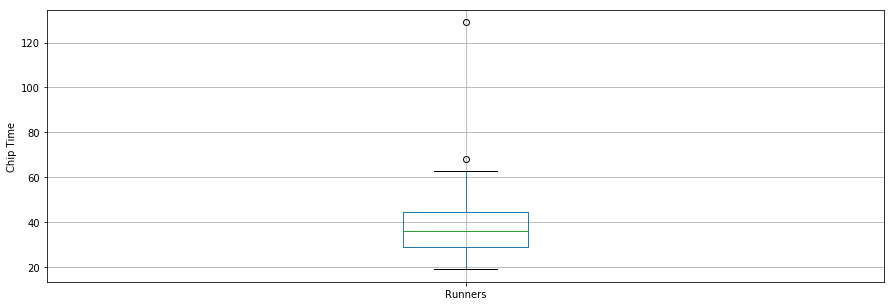

In [115]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

La segunda pregunta a responder es: ¿Los tiempos de finalización de los corredores siguieron una distribución normal?

A continuación se muestra un diagrama de distribución de los tiempos de chip de los corredores trazados usando la biblioteca naciente. La distribución se ve casi normal.

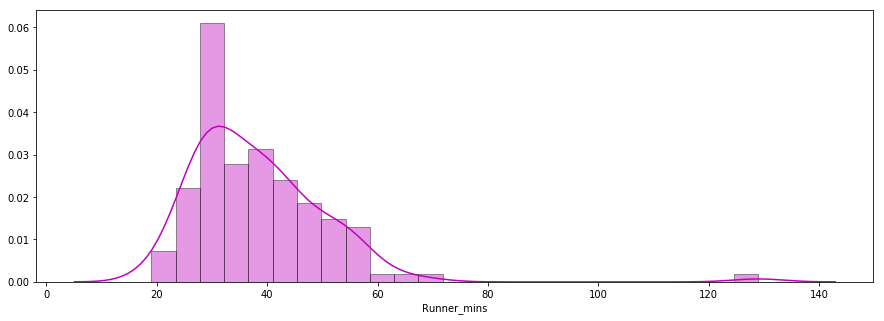

In [116]:
x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

La tercera pregunta se refiere a si hubo diferencias de rendimiento entre hombres y mujeres de varios grupos de edad. A continuación se muestra un diagrama de distribución de tiempos de chip para hombres y mujeres.

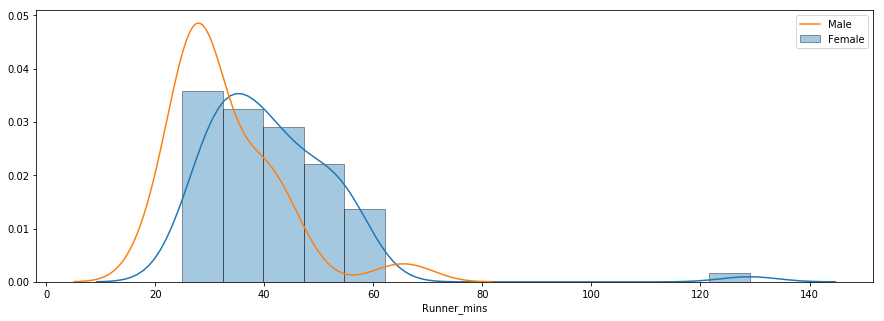

In [117]:
f_fuko = df7.loc[df7[' Gender']==' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender']==' M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

La distribución indica que las mujeres fueron más lentas que los hombres en promedio. Puede usar el método groupby () para calcular estadísticas de resumen para hombres y mujeres por separado, como se muestra a continuación

In [118]:
g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)

        Runner_mins                                                       
              count       mean        std   min    25%   50%    75%    max
 Gender                                                                   
 F             79.0  41.506329  13.544678  25.0  32.00  39.0  48.00  129.0
 M             44.0  32.795455  10.077789  19.0  26.75  29.0  39.25   68.0


El tiempo promedio de astillas para todas las mujeres y los hombres fue de ~ 41 minutos y ~ 44 minutos, respectivamente. A continuación se muestra una comparación de diagrama de caja de lado a lado de los tiempos de acabado masculino y femenino.

Text(0.5,0.98,'')

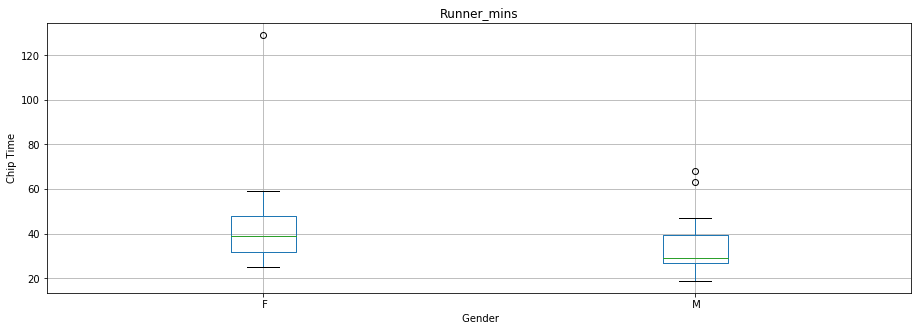

In [119]:
df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")